In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    
    sig = 1 / (1 + np.exp(-x))
    
    return(sig)

# Feed forward
def feed_forward(x, network):
    
    n_layers = network[4]+1 #number of hidden layers plus the output layer
    outputD = {}
    """
    print("============================FEEDFORWARD============================")
    print("=====================input {}=====================".format(x))
    print("Weights {}".format(network[0]))
    print("Bias {}".format(network[1]))
    print("Output {}".format(outputD))
    """
    for i in range(n_layers):
      
      if i==0: #if its the first layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(x,network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer
      elif i==n_layers-1: #if it is the last layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_out'].transpose()) + network[1]['b_out'] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_out']=output #stores the output of output layer
      else: #if its any other hidden layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer                       
      
      #print("Output {}".format(outputD))
    #print("============================FEEDFORWARD============================")
    
    return outputD

# Network error
def net_error(tar, out):
    
    #print("tar:{} out:{}".format(tar,out))
    err = 0.5 * np.power(tar - out, 2)
    
    return(err)

def outputLayer_Error(tar,network):
  
    #print("tar:{} net:{}".format(tar,network[2]['output_out']))
    #return -(tar - network[2]['output_out']) * network[2]['output_out'] * (1 - network[2]['output_out'])
    derivate = network[2]['output_out'] * (1-network[2]['output_out'])
    #print(derivate)
    diff = -(tar - network[2]['output_out'])
    #print(diff)
    return np.multiply(diff,derivate)
    
  
# Back-propagation
def BP(x, tar, network):
  
  
    """
    network[0]: weights
    network[1]: biases
    network[2]: outputs
    network[3]: error layer
    network[4]: n_hidden_layers


    """
    n_layers = network[4]+1 #number of hidden layers plus the output layer

    #Calculating errors of each layer
    for i in reversed(range(n_layers)):
      if i==n_layers-1: #if its the output layer
        # Output layer error (L)
        L_error = outputLayer_Error(tar,network)
        network[3]['e_output'] = L_error
      elif i==n_layers-2: #if its the last hidden layer before output layer
        if network[3]['e_output'].size!=1: #if its not only one neuron
          dotproduct = np.matmul(network[3]['e_output'],network[0]['W_out']) 
          l_error = dotproduct * network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)])
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
        else:
          l_error = (network[3]['e_output'] * network[0]['W_out']) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
      else:#if its any othe hidden layer
        if network[3]['e_hl'+str(i+1)].size!=1:
          dotproduct = np.matmul(network[3]['e_hl'+str(i+1)],network[0]['W_hl'+str(i+1)]) 
          l_error = dotproduct * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
        else:
          l_error = (network[3]['e_hl'+str(i+1)] * network[0]['W_hl'+str(i+1)]) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
              
    print("Error")
    print(format(network[3]))
    print()
          
    #Calculating new weights and bias
    n_Weights = {}
    n_Bias = {}
    
    #print(network)
    for i in reversed(range(n_layers)):
      if i==n_layers-1: #if its the output layer
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_output']))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_out = network[0]['W_out'] - alpha * network[3]['e_output'] * network[2]['output_hl'+str(i-1)]
        #e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
        #n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
        """
        if network[3]['e_output'].size == 1: #if its only one gate to solve
            n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(network[3]['e_output'] , network[2]['output_hl'+str(i-1)])))
            n_Weights['W_out'] = n_W_out
            n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
            n_Bias['b_out'] = n_b_out
        else:
            e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
            n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
            n_Weights['W_out'] = n_W_out
            n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
            n_Bias['b_out'] = n_b_out
                
      elif i!=0:#any other hidden layer
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * network[2]['output_hl'+str(i-1)])) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)]))) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        n_Weights['W_hl'+str(i)] = n_W_hl
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)])
        n_Bias['b_hl'+str(i)] = n_b_hl                                     
      else:#if its the first hidden layer
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(x))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * x)) #Actual weights - alpha *output_error * actual_input
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , x))) #Actual weights - alpha *output_error * actual_input
        n_Weights['W_hl'+str(i)] = n_W_hl   
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)]) #Actual bias - alpha * output_error
        n_Bias['b_hl'+str(i)] = n_b_hl
    
    return(n_Weights,n_Bias)

# Testing patterns
def testing_patterns(network,x_train,y_train):
    
    #print('       MLP result      ')
    #print('Pat:          t:      out:')
    count = 0
    Lista = []
    for x in x_train:
        output = feed_forward(x, network)
        formated_output = [ '%.3f' % elem for elem in output['output_out'] ]
        float_output = [ float(elem) for elem in formated_output]
        Lista.append([x,y_train[count],float_output])
        #print('{}. {} ---- {} ----> {}'.format(count, x, y_train[count],output['output_out']))
        count += 1
    print(tabulate(Lista,headers=['X','Target','Output'],tablefmt="fancy_grid"))
    
# Graph error
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('BP algorithm')
    plt.show()

# Decision boundaries
def dec_boundaries(X, t, network):
    
    # Creating mesh
    h = 0.01
    x_min, x_max = -0.2, 1.2
    y_min, y_max = -0.2, 1.2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.c_[xx.ravel(), yy.ravel()]
    out = np.zeros(np.shape(Z)[0])
    
    # Output model
    for i in range(len(out)):
        outputD =  feed_forward(Z[i], network)
        out[i] = outputD['output_out']

    # out = (out >= 0.5).astype(int)
    out = out.reshape(xx.shape)
    levels = np.linspace(0, 1)
    plt.figure(1)
    plt.contourf(xx, yy, out, levels)
    plt.colorbar()

    # Plotting data
    lis = np.unique(t)
    for i in range(len(t)):
        if i == 0:
            pos = np.where(t == 0)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'o', color = 'white', markersize = 15)

        else:
            pos = np.where(t == 1)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'x', color = 'red', markersize = 15)

    plt.title('Decision boundary')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#Defining architecture for the MLP    
def def_param(n_layers,X,t):
  weights = {}
  bias = {}
  n_neurons_layer = {}
  """
  initializing weights and bias as follows:
  np.random.normal(size=(param1,param2)), size takes two arguments where:
  
  param1 = no. neurons in the current layer
  param2 = no. neurons in the previous layer
  """
  for i in range(n_layers+1):
    
    if i==0:#if its the first layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,X.shape[1]))#the no. of neurons in the previous layers is equal to the input vector length
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)#the no. of bias is equal to the number of neurons
      n_neurons_layer['n_neurons'+str(i)] = n_neurons#stores the number of neurons in the current layer
    elif i==n_layers: #if its the output layer
      """
      the number of neurons in the output layer is equal to the target vector length
      """
      #weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
      #bias['b_out'] = np.random.normal(size=t.shape[1])
      if t.ndim == 1: #if its only one gate to solve
        weights['W_out'] = np.random.normal(size=(n_neurons_layer['n_neurons'+str(i-1)]))
        bias['b_out'] = np.random.normal(1)
        n_neurons_layer['n_neurons'+str(i)] =  1#stores the number of neurons in the current layer
      else:
        #t.shape[1] takes the number of columns of the target, this is the number of outputs in the output layer
        weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
        bias['b_out'] = np.random.normal(size=(t.shape[1]))
        n_neurons_layer['n_neurons'+str(i)] =  t.shape[1]#stores the number of neurons in the current layer
        
      
    else:#if its any other hidden layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,n_neurons_layer['n_neurons'+str(i-1)]))
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)
      n_neurons_layer['n_neurons'+str(i)] =  n_neurons#stores the number of neurons in the current layer
  
  return weights,bias      

def targets():
    print("¿Cuantas compuertas desea resolver?")
    print("[AND, OR, NAND, NOR, XOR]")
    op = int(input())
    if op == 1: #AND gate
        t = np.array([0, 0, 0, 1])
    elif op == 2: #AND, OR gate
        t = np.array([[0,0],[0,1],[0,1],[1,1]])
    elif op == 3: #AND, OR, NAND gate
        t = np.array([[0,0,1],[0,1,1],[0,1,1],[1,1,0]])
    elif op == 4: #AND, OR, NAND, NOR gate
        t = np.array([[0,0,1,1],[0,1,1,0],[0,1,1,0],[1,1,0,0]])
    elif op == 5: #AND, OR, NAND, NOR, XOR gate
        t = np.array([[0,0,1,1,0],[0,1,1,0,1],[0,1,1,0,1],[1,1,0,0,0]])
        
    print(t)
    return t
            
    


In [2]:
# Training patterns and targets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(X)
t = targets()

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
¿Cuantas compuertas desea resolver?
[AND, OR, NAND, NOR, XOR]
5
[[0 0 1 1 0]
 [0 1 1 0 1]
 [0 1 1 0 1]
 [1 1 0 0 0]]


## **Modelo de la red neuronal**

In [7]:
#MODEL FOR MLP WITH N-HIDDEN-LAYERS WITH N-NEURONS IN EACH ONE
def Neural_network_model(X,y):
  
  n_hidden_layers = int(input('Número de capas ocultas: '))
  #n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  layer_output = {}
  error_layer = {}
  weights,biases = def_param(n_hidden_layers,X,y)
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network


In [0]:
#MODEL FOR ONE HIDDEN LAYER WITH N-NEURONS

def Neural_network_model(X):
  
  n_hidden_layers = 1
  n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  weights = {
      'W_hl0':np.random.normal(size=(n_nodes_hl1,X.shape[1])),
      'W_out':np.random.normal(size=(n_nodes_hl1))
  }
  
  
  
  biases = {
      'b_hl0':np.random.normal(size=(n_nodes_hl1)),
      'b_out':np.random.normal(size=(1))
  }
  
  
  layer_output = {}
  error_layer = {}
  
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network

In [4]:

network = Neural_network_model(X,t)
print(network)


Número de capas ocultas: 5
Numero de neuronas en la capa 0 5
Numero de neuronas en la capa 1 5
Numero de neuronas en la capa 2 5
Numero de neuronas en la capa 3 5
Numero de neuronas en la capa 4 5
[{'W_hl0': array([[ 0.32362894, -0.21676822],
       [-1.31538767, -0.23935184],
       [ 0.49517142,  0.91752665],
       [ 0.66687465,  0.06283473],
       [-0.13288028, -0.43834703]]), 'W_hl1': array([[ 0.99081457,  0.80074038, -0.7531803 , -0.79822115,  1.60750438],
       [ 1.45328972, -1.57523731, -0.18805908,  1.05529801,  0.96565496],
       [-1.103132  , -0.44702159,  0.43805626,  1.6310668 , -0.36963763],
       [-0.92904871,  0.41305937, -1.40784132, -0.39232076,  1.6751135 ],
       [ 2.59354136, -0.99476993, -0.86475102, -1.43579517,  0.91610188]]), 'W_hl2': array([[-0.25868441,  1.52875193,  0.19347303, -0.1334713 , -0.31113528],
       [ 0.20210087, -0.26825664,  1.4050991 ,  0.80428663, -0.28650081],
       [-0.19003233, -1.98014671, -1.22082525,  2.33423155, -0.07538782],
   

## **Entrenando la red neuronal**

Epoch 0 error [0.000116, 0.000106, 0.000114, 9.9e-05, 0.000131]
Epoch 1 error [0.000116, 0.000106, 0.000114, 9.9e-05, 0.000131]
Epoch 2 error [0.000116, 0.000106, 0.000114, 9.9e-05, 0.000131]
Epoch 3 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 4 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 5 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 6 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 7 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 8 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 9 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 10 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 11 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 12 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 13 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 14 error [0.000116, 0.000106, 0.000113, 9.9e-05, 0.000131]
Epoch 15 error [0.000116, 0.000106,

Epoch 237 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 238 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 239 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 240 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 241 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 242 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 243 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 244 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 245 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 246 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 247 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 248 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 249 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 250 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 251 error [0.000112, 0.000102, 0.00011, 9.6e-05, 0.000126]
Epoch 252 error [0.000112

Epoch 379 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000124]
Epoch 380 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000124]
Epoch 381 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000124]
Epoch 382 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000124]
Epoch 383 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 384 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 385 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 386 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 387 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 388 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 389 error [0.00011, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 390 error [0.000109, 0.0001, 0.000108, 9.4e-05, 0.000123]
Epoch 391 error [0.000109, 0.0001, 0.000107, 9.4e-05, 0.000123]
Epoch 392 error [0.000109, 0.0001, 0.000107, 9.4e-05, 0.000123]
Epoch 393 error [0.000109, 0.0001, 0.000107, 9.4e-05, 0.000123]
Epoch 394 error [0.000109, 0.0001, 0.000107, 9.4e-0

Epoch 511 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 512 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 513 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 514 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 515 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 516 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 517 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 518 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 519 error [0.000108, 9.9e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 520 error [0.000108, 9.8e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 521 error [0.000108, 9.8e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 522 error [0.000108, 9.8e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 523 error [0.000108, 9.8e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 524 error [0.000107, 9.8e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 525 error [0.000107, 9.8e-05, 0.000106, 9.2e-05, 0.000121]
Epoch 526 error [0.000107

Epoch 642 error [0.000106, 9.7e-05, 0.000104, 9.1e-05, 0.000119]
Epoch 643 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 644 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 645 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 646 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 647 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 648 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 649 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 650 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 651 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 652 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 653 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000119]
Epoch 654 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000118]
Epoch 655 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000118]
Epoch 656 error [0.000106, 9.7e-05, 0.000104, 9e-05, 0.000118]
Epoch 657 error [0.000106, 9.7e-05, 0.000104, 9e-05, 

Epoch 797 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 798 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 799 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 800 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 801 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 802 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 803 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 804 error [0.000104, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 805 error [0.000103, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 806 error [0.000103, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 807 error [0.000103, 9.5e-05, 0.000102, 8.9e-05, 0.000116]
Epoch 808 error [0.000103, 9.5e-05, 0.000102, 8.8e-05, 0.000116]
Epoch 809 error [0.000103, 9.5e-05, 0.000102, 8.8e-05, 0.000116]
Epoch 810 error [0.000103, 9.5e-05, 0.000102, 8.8e-05, 0.000116]
Epoch 811 error [0.000103, 9.5e-05, 0.000102, 8.8e-05, 0.000116]
Epoch 812 error [0.000103

Epoch 946 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000114]
Epoch 947 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 948 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 949 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 950 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 951 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 952 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 953 error [0.000102, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 954 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 955 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 956 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 957 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 958 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 959 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 960 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.000113]
Epoch 961 error [0.000101, 9.3e-05, 0.0001, 8.7e-05, 0.

Epoch 1225 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1226 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1227 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1228 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1229 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1230 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1231 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1232 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1233 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1234 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1235 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1236 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1237 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1238 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1239 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 1240 error [9.8e-05, 9e-05, 9.6e-05, 8.4e-05, 0.000109]
Epoch 12

Epoch 1419 error [9.6e-05, 8.8e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1420 error [9.6e-05, 8.8e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1421 error [9.6e-05, 8.8e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1422 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1423 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1424 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1425 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1426 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1427 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1428 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1429 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1430 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1431 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1432 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1433 error [9.6e-05, 8.7e-05, 9.4e-05, 8.2e-05, 0.000106]
Epoch 1434 error [9.6e-05, 8.7e-05, 9.4e

Epoch 1569 error [9.4e-05, 8.6e-05, 9.3e-05, 8e-05, 0.000104]
Epoch 1570 error [9.4e-05, 8.6e-05, 9.3e-05, 8e-05, 0.000104]
Epoch 1571 error [9.4e-05, 8.6e-05, 9.3e-05, 8e-05, 0.000104]
Epoch 1572 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1573 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1574 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1575 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1576 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1577 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1578 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1579 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1580 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1581 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1582 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1583 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 1584 error [9.4e-05, 8.6e-05, 9.2e-05, 8e-05, 0.000104]
Epoch 15

Epoch 1744 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1745 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1746 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1747 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1748 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1749 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1750 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1751 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1752 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1753 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1754 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1755 error [9.2e-05, 8.4e-05, 9.1e-05, 7.9e-05, 0.000102]
Epoch 1756 error [9.2e-05, 8.4e-05, 9.1e-05, 7.8e-05, 0.000102]
Epoch 1757 error [9.2e-05, 8.4e-05, 9.1e-05, 7.8e-05, 0.000102]
Epoch 1758 error [9.2e-05, 8.4e-05, 9e-05, 7.8e-05, 0.000102]
Epoch 1759 error [9.2e-05, 8.4e-05, 9e-05,

Epoch 1917 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1918 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1919 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1920 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1921 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1922 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1923 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1924 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1925 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1926 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1927 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1928 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1929 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1930 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1931 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1932 error [9e-05, 8.2e-05, 8.9e-05, 7.7e-05, 9.9e-05]
Epoch 1933 error [9e-05,

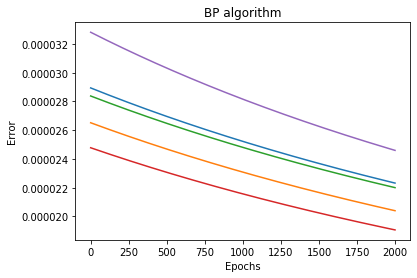

In [28]:
err_vector = []
alpha = 0.7
epochs = 2000

#def train_NeuralNetwork(epochs,network):
def train_NeuralNetwork(epochs,network,x_train,y_train):
    for epoch in range(epochs):

        count = 0
        err = 0

        #for x in X:
        for x in x_train:

            # Feed forward
            network[2] = feed_forward(x, network)

            # Network error
            err += net_error(y_train[count], network[2]['output_out'])

            # Back propagation
            network[0],network[1] = BP(x, y_train[count], network)

            count += 1
        formated_error = [ '%.6f' % elem for elem in err ]
        float_error = [ float(elem) for elem in formated_error]
        print("Epoch {} error {}".format(epoch,float_error))    
        err_vector.append(err / X.shape[0])

train_NeuralNetwork(epochs,network,X,t)
#testing patterns
testing_patterns(network,X,t)

# Graph error
graph_error(err_vector)

# Decision boundaries
#dec_boundaries(X, t,  network)



# Entrenando Iris Dataset

In [4]:
from sklearn import datasets #importa la librería de datasets

dataset = datasets.load_iris()#importamos el dataset


In [8]:
#print(dataset)
x_train = dataset.data[:,1::2] #extraemos los datos
original_targets = dataset.target #extraemos las etiquetas de los datos
#print(x_train)
#print(original_targets.shape)

def one_hot(labels):
    onehot_code = {0:[0,0,1],#For original label with code 0
                   1:[0,1,0],#For original label with code 1
                   2:[1,0,0]#For original label with code 2
                  }
    targets = []
    for label in labels: #for each label in the y_train array
        onehot_label = onehot_code[label]
        targets.append(onehot_label)
    
    return np.array(targets)
y_train = one_hot(original_targets)  

print(x_train.shape)
print(y_train.shape)
count = 0
"""
for x in x_train:
    if count == 0:
        print('Class 1')
    elif count == 50:
        print('Class 2')
    elif count == 100:
        print('Class 3')
    count +=1
    print(x)
"""

(150, 2)
(150, 3)


"\nfor x in x_train:\n    if count == 0:\n        print('Class 1')\n    elif count == 50:\n        print('Class 2')\n    elif count == 100:\n        print('Class 3')\n    count +=1\n    print(x)\n"

# Insisos A y B #

In [29]:
network_iris_AB = Neural_network_model(x_train,y_train)
aux_network_iris = network_iris_AB #to save the original initial value of the network

Número de capas ocultas: 4
Numero de neuronas en la capa 0 10
Numero de neuronas en la capa 1 10
Numero de neuronas en la capa 2 10
Numero de neuronas en la capa 3 10


In [2]:
#print(network_iris_AB)

# Entrenando red(Inciso A y B)#

Epoch 0 error [11.503177, 12.107178, 6.022987]
Epoch 1 error [12.742753, 11.783579, 8.735994]
Epoch 2 error [12.127498, 11.757632, 8.443214]
Epoch 3 error [10.925228, 11.612549, 7.975997]
Epoch 4 error [9.307393, 11.405788, 7.373186]
Epoch 5 error [7.568587, 11.369127, 6.515307]
Epoch 6 error [5.953421, 11.701805, 5.391172]
Epoch 7 error [4.594631, 12.175368, 4.428908]
Epoch 8 error [3.55983, 12.398327, 3.934174]
Epoch 9 error [2.820576, 12.319775, 3.885955]
Epoch 10 error [2.281135, 12.07315, 4.111683]
Epoch 11 error [1.890487, 11.854047, 4.426442]
Epoch 12 error [1.61802, 11.750671, 4.651772]
Epoch 13 error [1.435379, 11.717117, 4.711461]
Epoch 14 error [1.333308, 11.712154, 4.622992]
Epoch 15 error [1.25451, 11.642777, 4.429149]
Epoch 16 error [1.173316, 11.468117, 4.163695]
Epoch 17 error [1.092006, 11.183603, 3.838995]
Epoch 18 error [1.016868, 10.788349, 3.460769]
Epoch 19 error [0.950149, 10.271809, 3.037055]
Epoch 20 error [0.891459, 9.61809, 2.583609]
Epoch 21 error [0.840372,

Epoch 181 error [1.169367, 1.14481, 0.009229]
Epoch 182 error [0.896123, 0.885558, 0.008015]
Epoch 183 error [1.494611, 1.646915, 0.019548]
Epoch 184 error [1.086649, 1.107488, 0.010445]
Epoch 185 error [1.459872, 1.605496, 0.017261]
Epoch 186 error [0.831348, 0.75821, 0.009374]
Epoch 187 error [1.022072, 1.016985, 0.008131]
Epoch 188 error [1.355271, 1.394788, 0.008699]
Epoch 189 error [1.168114, 1.122856, 0.007447]
Epoch 190 error [1.075247, 1.071694, 0.006523]
Epoch 191 error [1.152251, 1.130098, 0.006736]
Epoch 192 error [1.172789, 1.160347, 0.007037]
Epoch 193 error [1.83076, 1.904105, 0.011829]
Epoch 194 error [1.117639, 1.098183, 0.007031]
Epoch 195 error [1.11275, 1.102479, 0.006784]
Epoch 196 error [1.075439, 1.097308, 0.008823]
Epoch 197 error [1.347801, 1.389406, 0.008093]
Epoch 198 error [1.183534, 1.162731, 0.007625]
Epoch 199 error [1.284235, 1.317889, 0.007885]
Epoch 200 error [1.114943, 1.165572, 0.006851]
Epoch 201 error [1.440151, 1.53656, 0.017128]
Epoch 202 error [0

Epoch 360 error [1.858912, 1.895145, 0.005182]
Epoch 361 error [2.214488, 2.282122, 0.004809]
Epoch 362 error [1.862669, 1.898219, 0.005192]
Epoch 363 error [2.219885, 2.289118, 0.004839]
Epoch 364 error [1.866074, 1.900892, 0.005203]
Epoch 365 error [2.224884, 2.295446, 0.004869]
Epoch 366 error [1.868732, 1.902706, 0.005207]
Epoch 367 error [2.235168, 2.308352, 0.004901]
Epoch 368 error [1.870285, 1.903373, 0.005214]
Epoch 369 error [2.242092, 2.316557, 0.004934]
Epoch 370 error [1.871471, 1.903605, 0.005225]
Epoch 371 error [2.252225, 2.328676, 0.004969]
Epoch 372 error [1.872458, 1.903661, 0.005243]
Epoch 373 error [2.249837, 2.324756, 0.005005]
Epoch 374 error [1.876026, 1.90608, 0.005267]
Epoch 375 error [2.257168, 2.333987, 0.00505]
Epoch 376 error [1.879493, 1.908364, 0.005287]
Epoch 377 error [2.240367, 2.313187, 0.005097]
Epoch 378 error [1.881254, 1.907938, 0.005299]
Epoch 379 error [2.294359, 2.382678, 0.005132]
Epoch 380 error [1.86582, 1.892674, 0.005327]
Epoch 381 error 

Epoch 537 error [2.222505, 2.312026, 0.003969]
Epoch 538 error [2.220915, 2.310503, 0.003988]
Epoch 539 error [2.21933, 2.308963, 0.004007]
Epoch 540 error [2.217751, 2.307397, 0.004027]
Epoch 541 error [2.21618, 2.305793, 0.004047]
Epoch 542 error [2.214621, 2.304129, 0.004068]
Epoch 543 error [2.213066, 2.302358, 0.004091]
Epoch 544 error [2.211474, 2.300364, 0.004116]
Epoch 545 error [2.209665, 2.297776, 0.004147]
Epoch 546 error [2.206803, 2.293148, 0.004193]
Epoch 547 error [2.198417, 2.279019, 0.004286]
Epoch 548 error [2.184878, 2.246441, 0.004627]
Epoch 549 error [2.296675, 2.36636, 0.005505]
Epoch 550 error [2.208879, 2.278839, 0.004616]
Epoch 551 error [2.250622, 2.319133, 0.004897]
Epoch 552 error [2.23697, 2.310375, 0.004522]
Epoch 553 error [2.244664, 2.323085, 0.004284]
Epoch 554 error [2.225033, 2.307508, 0.003961]
Epoch 555 error [2.222226, 2.307546, 0.003989]
Epoch 556 error [2.215656, 2.303263, 0.003982]
Epoch 557 error [2.212153, 2.301556, 0.004024]
Epoch 558 error [

Epoch 716 error [2.322309, 2.364503, 0.003304]
Epoch 717 error [2.224657, 2.274844, 0.002833]
Epoch 718 error [2.201716, 2.251836, 0.002662]
Epoch 719 error [2.224382, 2.279307, 0.00288]
Epoch 720 error [2.172614, 2.248226, 0.002915]
Epoch 721 error [2.286512, 2.342745, 0.003641]
Epoch 722 error [2.20579, 2.260681, 0.002842]
Epoch 723 error [2.167653, 2.24492, 0.003012]
Epoch 724 error [2.18147, 2.233231, 0.003686]
Epoch 725 error [2.214753, 2.266228, 0.003862]
Epoch 726 error [2.199306, 2.25173, 0.003076]
Epoch 727 error [2.186203, 2.254739, 0.003279]
Epoch 728 error [2.200068, 2.256146, 0.003645]
Epoch 729 error [2.189815, 2.251028, 0.003712]
Epoch 730 error [2.188718, 2.240217, 0.003954]
Epoch 731 error [2.235357, 2.287063, 0.004224]
Epoch 732 error [2.178032, 2.23291, 0.003438]
Epoch 733 error [2.17601, 2.23422, 0.00347]
Epoch 734 error [2.220491, 2.279433, 0.003663]
Epoch 735 error [2.149153, 2.232871, 0.002964]
Epoch 736 error [2.174886, 2.238382, 0.003174]
Epoch 737 error [2.174

Epoch 895 error [3.012838, 2.979748, 0.002595]
Epoch 896 error [2.284332, 2.308751, 0.003004]
Epoch 897 error [3.153895, 3.191617, 0.002321]
Epoch 898 error [2.467201, 2.509478, 0.002217]
Epoch 899 error [2.474725, 2.511761, 0.00218]
Epoch 900 error [2.383606, 2.429781, 0.002135]
Epoch 901 error [2.132585, 2.194067, 0.002416]
Epoch 902 error [2.242418, 2.266436, 0.00237]
Epoch 903 error [2.113577, 2.160576, 0.002321]
Epoch 904 error [2.185865, 2.210865, 0.002125]
Epoch 905 error [2.190144, 2.221446, 0.00189]
Epoch 906 error [2.136873, 2.192323, 0.001702]
Epoch 907 error [2.181968, 2.224494, 0.001605]
Epoch 908 error [2.148547, 2.199338, 0.001572]
Epoch 909 error [2.310723, 2.33457, 0.001998]
Epoch 910 error [2.3072, 2.336237, 0.002549]
Epoch 911 error [2.192385, 2.22186, 0.003546]
Epoch 912 error [2.390404, 2.403068, 0.00359]
Epoch 913 error [2.343119, 2.370766, 0.003574]
Epoch 914 error [2.184879, 2.218482, 0.004398]
Epoch 915 error [2.396425, 2.431819, 0.004522]
Epoch 916 error [2.27

Epoch 1244 error [2.150477, 2.014199, 0.004968]
Epoch 1245 error [2.316671, 2.244119, 0.007687]
Epoch 1246 error [2.186454, 2.111366, 0.005018]
Epoch 1247 error [2.341221, 2.308493, 0.004478]
Epoch 1248 error [2.406619, 2.331979, 0.009527]
Epoch 1249 error [2.264191, 2.215646, 0.00648]
Epoch 1250 error [2.240005, 2.193054, 0.006344]
Epoch 1251 error [2.333622, 2.281731, 0.009311]
Epoch 1252 error [3.335641, 3.333245, 0.00701]
Epoch 1253 error [1.814115, 1.774267, 0.010292]
Epoch 1254 error [2.348276, 2.257287, 0.007029]
Epoch 1255 error [2.224057, 2.172207, 0.006294]
Epoch 1256 error [2.255306, 2.232112, 0.006477]
Epoch 1257 error [2.351939, 2.311716, 0.008083]
Epoch 1258 error [2.246599, 2.20636, 0.006443]
Epoch 1259 error [2.326663, 2.328061, 0.006267]
Epoch 1260 error [2.21188, 2.155156, 0.006148]
Epoch 1261 error [2.136541, 2.096025, 0.010933]
Epoch 1262 error [2.707565, 2.644714, 0.01031]
Epoch 1263 error [2.527579, 2.546177, 0.009632]
Epoch 1264 error [2.263691, 2.202508, 0.00614

Epoch 1416 error [2.543035, 2.514807, 0.007813]
Epoch 1417 error [2.246184, 2.040901, 0.005727]
Epoch 1418 error [2.063804, 2.063673, 0.006382]
Epoch 1419 error [2.538096, 2.504092, 0.007534]
Epoch 1420 error [2.318091, 2.128831, 0.005522]
Epoch 1421 error [2.120727, 2.09772, 0.006192]
Epoch 1422 error [2.425307, 2.355533, 0.006747]
Epoch 1423 error [2.233681, 2.277213, 0.006061]
Epoch 1424 error [2.224966, 2.182934, 0.005131]
Epoch 1425 error [2.311561, 2.233644, 0.003915]
Epoch 1426 error [2.474176, 2.371042, 0.006083]
Epoch 1427 error [2.031585, 1.855942, 0.007236]
Epoch 1428 error [2.191573, 2.10984, 0.005034]
Epoch 1429 error [2.548603, 2.643099, 0.004521]
Epoch 1430 error [2.43872, 2.390703, 0.007453]
Epoch 1431 error [2.083116, 1.992567, 0.006601]
Epoch 1432 error [2.392964, 2.195161, 0.003874]
Epoch 1433 error [2.212593, 2.060715, 0.003125]
Epoch 1434 error [2.100041, 2.022369, 0.006381]
Epoch 1435 error [2.120331, 2.095652, 0.004866]
Epoch 1436 error [2.461839, 2.508432, 0.003

Epoch 1761 error [2.109526, 2.064348, 0.001524]
Epoch 1762 error [3.913883, 3.970477, 0.000609]
Epoch 1763 error [2.263857, 2.273128, 0.00115]
Epoch 1764 error [2.240145, 2.237467, 0.001083]
Epoch 1765 error [2.513362, 2.513172, 0.000969]
Epoch 1766 error [2.185402, 2.146959, 0.001084]
Epoch 1767 error [2.644427, 2.644535, 0.000904]
Epoch 1768 error [2.65244, 2.64667, 0.000931]
Epoch 1769 error [2.704501, 2.705745, 0.000931]
Epoch 1770 error [2.468103, 2.445255, 0.000973]
Epoch 1771 error [2.220401, 2.167182, 0.001048]
Epoch 1772 error [2.460739, 2.374404, 0.00094]
Epoch 1773 error [2.471697, 2.443455, 0.000952]
Epoch 1774 error [1.970846, 2.02685, 0.001478]
Epoch 1775 error [2.107683, 2.204302, 0.006142]
Epoch 1776 error [1.947742, 1.973065, 0.001401]
Epoch 1777 error [2.056226, 2.014558, 0.001226]
Epoch 1778 error [1.961815, 1.989004, 0.002662]
Epoch 1779 error [1.80704, 1.831507, 0.002674]
Epoch 1780 error [1.866401, 1.856291, 0.002714]
Epoch 1781 error [1.813672, 1.842513, 0.00379]

Epoch 1936 error [2.529379, 2.535598, 0.000221]
Epoch 1937 error [2.547321, 2.550112, 0.00022]
Epoch 1938 error [2.568134, 2.554672, 0.000225]
Epoch 1939 error [2.262844, 2.266888, 0.00026]
Epoch 1940 error [2.434226, 2.425021, 0.000251]
Epoch 1941 error [2.329266, 2.320172, 0.000282]
Epoch 1942 error [2.489295, 2.458742, 0.000276]
Epoch 1943 error [2.504717, 2.451943, 0.000314]
Epoch 1944 error [2.363457, 2.304153, 0.000376]
Epoch 1945 error [2.43032, 2.371308, 0.000441]
Epoch 1946 error [2.376588, 2.323272, 0.000511]
Epoch 1947 error [2.381844, 2.327459, 0.000583]
Epoch 1948 error [2.363393, 2.309318, 0.000695]
Epoch 1949 error [2.347939, 2.293992, 0.000893]
Epoch 1950 error [2.326994, 2.273058, 0.001244]
Epoch 1951 error [2.198895, 2.152951, 0.001978]
Epoch 1952 error [2.205606, 2.159865, 0.003157]
Epoch 1953 error [2.141661, 2.105981, 0.004502]
Epoch 1954 error [2.095568, 2.069718, 0.004851]
Epoch 1955 error [1.977144, 2.034925, 0.007227]
Epoch 1956 error [2.252714, 2.224446, 0.001

Epoch 2108 error [3.175806, 3.329015, 0.004667]
Epoch 2109 error [2.485865, 2.512087, 0.00054]
Epoch 2110 error [2.128086, 2.131835, 0.000404]
Epoch 2111 error [2.103233, 2.106451, 0.000377]
Epoch 2112 error [2.104569, 2.107782, 0.000363]
Epoch 2113 error [2.129053, 2.136619, 0.000358]
Epoch 2114 error [2.411018, 2.414159, 0.000358]
Epoch 2115 error [2.29209, 2.282214, 0.000355]
Epoch 2116 error [2.343922, 2.318446, 0.00036]
Epoch 2117 error [2.207946, 2.150561, 0.000384]
Epoch 2118 error [2.2183, 2.152264, 0.000407]
Epoch 2119 error [2.260009, 2.191006, 0.000428]
Epoch 2120 error [2.145709, 2.095389, 0.0005]
Epoch 2121 error [2.121861, 2.07743, 0.000646]
Epoch 2122 error [2.096213, 2.059033, 0.000786]
Epoch 2123 error [2.046896, 2.022072, 0.000959]
Epoch 2124 error [2.007067, 1.996702, 0.001233]
Epoch 2125 error [1.996432, 1.980054, 0.001638]
Epoch 2126 error [1.874563, 1.881089, 0.008457]
Epoch 2127 error [2.101214, 2.114634, 0.003756]
Epoch 2128 error [3.095527, 3.170874, 0.000593]


Epoch 2284 error [2.157959, 2.092058, 0.000572]
Epoch 2285 error [2.161013, 2.096542, 0.0005]
Epoch 2286 error [2.139985, 2.080136, 0.000495]
Epoch 2287 error [2.099435, 2.04145, 0.000511]
Epoch 2288 error [2.069472, 2.011314, 0.000531]
Epoch 2289 error [2.048599, 1.989785, 0.000555]
Epoch 2290 error [2.033205, 1.974062, 0.000585]
Epoch 2291 error [2.018316, 1.960779, 0.000633]
Epoch 2292 error [1.984958, 1.940311, 0.000747]
Epoch 2293 error [1.926678, 1.921484, 0.001195]
Epoch 2294 error [1.926596, 1.92388, 0.002728]
Epoch 2295 error [2.83948, 2.854998, 0.000571]
Epoch 2296 error [1.852247, 1.821509, 0.000805]
Epoch 2297 error [1.82533, 1.823248, 0.001312]
Epoch 2298 error [1.781142, 1.756913, 0.002811]
Epoch 2299 error [1.84909, 1.811672, 0.00397]
Epoch 2300 error [2.186025, 2.195527, 0.000964]
Epoch 2301 error [1.77291, 1.7855, 0.001805]
Epoch 2302 error [1.662857, 1.622958, 0.004277]
Epoch 2303 error [1.834694, 1.830018, 0.002165]
Epoch 2304 error [1.730901, 1.709816, 0.004602]
Epo

Epoch 2461 error [1.226073, 1.239699, 0.001647]
Epoch 2462 error [1.22555, 1.239218, 0.001628]
Epoch 2463 error [1.225037, 1.238747, 0.001608]
Epoch 2464 error [1.224535, 1.238285, 0.00159]
Epoch 2465 error [1.224042, 1.237832, 0.001572]
Epoch 2466 error [1.223559, 1.237387, 0.001554]
Epoch 2467 error [1.223084, 1.23695, 0.001537]
Epoch 2468 error [1.222618, 1.236521, 0.001521]
Epoch 2469 error [1.22216, 1.236099, 0.001505]
Epoch 2470 error [1.22171, 1.235684, 0.001489]
Epoch 2471 error [1.221268, 1.235276, 0.001474]
Epoch 2472 error [1.220832, 1.234875, 0.00146]
Epoch 2473 error [1.220404, 1.23448, 0.001445]
Epoch 2474 error [1.219982, 1.234091, 0.001432]
Epoch 2475 error [1.219567, 1.233708, 0.001418]
Epoch 2476 error [1.219158, 1.23333, 0.001405]
Epoch 2477 error [1.218755, 1.232958, 0.001392]
Epoch 2478 error [1.218357, 1.232591, 0.00138]
Epoch 2479 error [1.217965, 1.232228, 0.001368]
Epoch 2480 error [1.217578, 1.231871, 0.001356]
Epoch 2481 error [1.217196, 1.231518, 0.001345]
E

Epoch 2635 error [1.17607, 1.191307, 0.000931]
Epoch 2636 error [1.175824, 1.191057, 0.000931]
Epoch 2637 error [1.175578, 1.190808, 0.000932]
Epoch 2638 error [1.175332, 1.190558, 0.000932]
Epoch 2639 error [1.175085, 1.190307, 0.000933]
Epoch 2640 error [1.174838, 1.190057, 0.000933]
Epoch 2641 error [1.174591, 1.189806, 0.000934]
Epoch 2642 error [1.174343, 1.189554, 0.000934]
Epoch 2643 error [1.174095, 1.189302, 0.000935]
Epoch 2644 error [1.173846, 1.18905, 0.000935]
Epoch 2645 error [1.173597, 1.188798, 0.000936]
Epoch 2646 error [1.173348, 1.188545, 0.000937]
Epoch 2647 error [1.173098, 1.188291, 0.000937]
Epoch 2648 error [1.172848, 1.188038, 0.000938]
Epoch 2649 error [1.172597, 1.187784, 0.000939]
Epoch 2650 error [1.172346, 1.187529, 0.00094]
Epoch 2651 error [1.172095, 1.187274, 0.00094]
Epoch 2652 error [1.171843, 1.187019, 0.000941]
Epoch 2653 error [1.171591, 1.186764, 0.000942]
Epoch 2654 error [1.171338, 1.186507, 0.000943]
Epoch 2655 error [1.171085, 1.186251, 0.0009

Epoch 2809 error [1.136867, 1.150673, 0.001165]
Epoch 2810 error [1.136712, 1.150498, 0.001166]
Epoch 2811 error [1.136557, 1.150324, 0.001167]
Epoch 2812 error [1.136402, 1.150149, 0.001168]
Epoch 2813 error [1.136248, 1.149975, 0.001169]
Epoch 2814 error [1.136094, 1.149801, 0.001169]
Epoch 2815 error [1.13594, 1.149628, 0.00117]
Epoch 2816 error [1.135786, 1.149454, 0.001171]
Epoch 2817 error [1.135632, 1.149281, 0.001171]
Epoch 2818 error [1.135479, 1.149107, 0.001172]
Epoch 2819 error [1.135325, 1.148934, 0.001173]
Epoch 2820 error [1.135172, 1.148761, 0.001173]
Epoch 2821 error [1.135018, 1.148588, 0.001174]
Epoch 2822 error [1.134865, 1.148415, 0.001174]
Epoch 2823 error [1.134712, 1.148242, 0.001175]
Epoch 2824 error [1.134558, 1.148069, 0.001175]
Epoch 2825 error [1.134405, 1.147896, 0.001176]
Epoch 2826 error [1.134252, 1.147723, 0.001176]
Epoch 2827 error [1.134098, 1.14755, 0.001176]
Epoch 2828 error [1.133945, 1.147378, 0.001177]
Epoch 2829 error [1.133792, 1.147205, 0.001

Epoch 2984 error [1.109876, 1.120977, 0.001095]
Epoch 2985 error [1.109731, 1.12082, 0.001094]
Epoch 2986 error [1.109586, 1.120662, 0.001093]
Epoch 2987 error [1.109441, 1.120505, 0.001093]
Epoch 2988 error [1.109297, 1.120349, 0.001092]
Epoch 2989 error [1.109153, 1.120192, 0.001091]
Epoch 2990 error [1.109009, 1.120036, 0.001091]
Epoch 2991 error [1.108866, 1.119881, 0.00109]
Epoch 2992 error [1.108723, 1.119725, 0.00109]
Epoch 2993 error [1.10858, 1.11957, 0.001089]
Epoch 2994 error [1.108438, 1.119415, 0.001088]
Epoch 2995 error [1.108296, 1.119261, 0.001088]
Epoch 2996 error [1.108154, 1.119106, 0.001087]
Epoch 2997 error [1.108013, 1.118952, 0.001087]
Epoch 2998 error [1.107872, 1.118799, 0.001086]
Epoch 2999 error [1.107731, 1.118645, 0.001086]
Epoch 3000 error [1.107591, 1.118493, 0.001085]
Epoch 3001 error [1.107451, 1.11834, 0.001084]
Epoch 3002 error [1.107311, 1.118188, 0.001084]
Epoch 3003 error [1.107171, 1.118036, 0.001083]
Epoch 3004 error [1.107032, 1.117884, 0.001083

Epoch 3329 error [1.076193, 1.08245, 0.000992]
Epoch 3330 error [1.076126, 1.082371, 0.000991]
Epoch 3331 error [1.07606, 1.082291, 0.000991]
Epoch 3332 error [1.075994, 1.082211, 0.00099]
Epoch 3333 error [1.075928, 1.082132, 0.00099]
Epoch 3334 error [1.075862, 1.082053, 0.000989]
Epoch 3335 error [1.075796, 1.081974, 0.000989]
Epoch 3336 error [1.075731, 1.081895, 0.000988]
Epoch 3337 error [1.075665, 1.081816, 0.000988]
Epoch 3338 error [1.0756, 1.081737, 0.000987]
Epoch 3339 error [1.075535, 1.081659, 0.000987]
Epoch 3340 error [1.07547, 1.08158, 0.000986]
Epoch 3341 error [1.075405, 1.081502, 0.000986]
Epoch 3342 error [1.07534, 1.081424, 0.000985]
Epoch 3343 error [1.075275, 1.081346, 0.000985]
Epoch 3344 error [1.07521, 1.081268, 0.000984]
Epoch 3345 error [1.075146, 1.081191, 0.000984]
Epoch 3346 error [1.075082, 1.081113, 0.000983]
Epoch 3347 error [1.075017, 1.081036, 0.000983]
Epoch 3348 error [1.074953, 1.080959, 0.000982]
Epoch 3349 error [1.074889, 1.080881, 0.000982]
Ep

Epoch 3504 error [1.066335, 1.070498, 0.00088]
Epoch 3505 error [1.066288, 1.07044, 0.000879]
Epoch 3506 error [1.066241, 1.070383, 0.000879]
Epoch 3507 error [1.066194, 1.070325, 0.000878]
Epoch 3508 error [1.066147, 1.070268, 0.000877]
Epoch 3509 error [1.0661, 1.070211, 0.000876]
Epoch 3510 error [1.066054, 1.070154, 0.000876]
Epoch 3511 error [1.066007, 1.070097, 0.000875]
Epoch 3512 error [1.065961, 1.07004, 0.000874]
Epoch 3513 error [1.065914, 1.069983, 0.000873]
Epoch 3514 error [1.065868, 1.069927, 0.000873]
Epoch 3515 error [1.065822, 1.06987, 0.000872]
Epoch 3516 error [1.065776, 1.069814, 0.000871]
Epoch 3517 error [1.06573, 1.069757, 0.00087]
Epoch 3518 error [1.065684, 1.069701, 0.00087]
Epoch 3519 error [1.065638, 1.069645, 0.000869]
Epoch 3520 error [1.065592, 1.069589, 0.000868]
Epoch 3521 error [1.065546, 1.069533, 0.000867]
Epoch 3522 error [1.065501, 1.069477, 0.000866]
Epoch 3523 error [1.065455, 1.069422, 0.000866]
Epoch 3524 error [1.06541, 1.069366, 0.000865]
Ep

Epoch 3681 error [1.059328, 1.061828, 0.000743]
Epoch 3682 error [1.059295, 1.061787, 0.000742]
Epoch 3683 error [1.059263, 1.061746, 0.000741]
Epoch 3684 error [1.059231, 1.061705, 0.000741]
Epoch 3685 error [1.059198, 1.061664, 0.00074]
Epoch 3686 error [1.059166, 1.061623, 0.000739]
Epoch 3687 error [1.059134, 1.061582, 0.000738]
Epoch 3688 error [1.059102, 1.061542, 0.000738]
Epoch 3689 error [1.05907, 1.061501, 0.000737]
Epoch 3690 error [1.059038, 1.06146, 0.000736]
Epoch 3691 error [1.059006, 1.06142, 0.000735]
Epoch 3692 error [1.058974, 1.06138, 0.000735]
Epoch 3693 error [1.058943, 1.061339, 0.000734]
Epoch 3694 error [1.058911, 1.061299, 0.000733]
Epoch 3695 error [1.058879, 1.061259, 0.000732]
Epoch 3696 error [1.058848, 1.061219, 0.000732]
Epoch 3697 error [1.058816, 1.061179, 0.000731]
Epoch 3698 error [1.058785, 1.061139, 0.00073]
Epoch 3699 error [1.058754, 1.061099, 0.000729]
Epoch 3700 error [1.058723, 1.061059, 0.000729]
Epoch 3701 error [1.058692, 1.061019, 0.000728

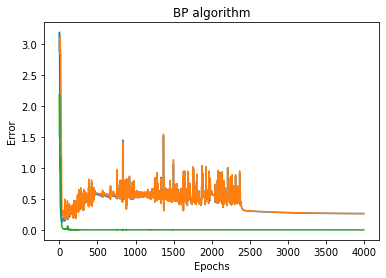

In [31]:
err_vector = []
alpha = 0.2
train_NeuralNetwork(4000,network_iris_AB,x_train,y_train)
#testing patterns
testing_patterns(network_iris_AB,x_train,y_train)

# Graph error
graph_error(err_vector)

# Definimos nuestra arquitectura de red neuronal para C#

In [36]:
network_iris = Neural_network_model(x_train,y_train)
aux_network_iris = network_iris #to save the original initial value of the network

Número de capas ocultas: 5
Numero de neuronas en la capa 0 10
Numero de neuronas en la capa 1 10
Numero de neuronas en la capa 2 10
Numero de neuronas en la capa 3 10
Numero de neuronas en la capa 4 10


In [1]:
#print(network_iris)

# Entrenamos la red #

Epoch 0 error [28.629248, 12.968524, 8.945352]
Epoch 1 error [12.946818, 10.539904, 10.343755]
Epoch 2 error [12.073854, 10.867226, 9.806531]
Epoch 3 error [11.397524, 11.090682, 9.484523]
Epoch 4 error [10.564926, 11.211492, 9.227101]
Epoch 5 error [9.55789, 11.155406, 8.97713]
Epoch 6 error [8.352928, 10.901294, 8.689336]
Epoch 7 error [6.996232, 10.543961, 8.345367]
Epoch 8 error [5.640886, 10.2962, 7.939169]
Epoch 9 error [4.465863, 10.329938, 7.493408]
Epoch 10 error [3.573425, 10.593207, 7.109169]
Epoch 11 error [2.96139, 10.923516, 6.911051]
Epoch 12 error [2.559801, 11.210816, 6.945199]
Epoch 13 error [2.290083, 11.420283, 7.165517]
Epoch 14 error [2.105627, 11.593819, 7.460602]
Epoch 15 error [1.99609, 11.811663, 7.722353]
Epoch 16 error [1.94933, 12.109209, 7.902494]
Epoch 17 error [1.938076, 12.491252, 7.998978]
Epoch 18 error [1.942427, 13.004433, 8.024234]
Epoch 19 error [1.919728, 13.49424, 8.00172]
Epoch 20 error [1.864644, 13.838017, 7.985985]
Epoch 21 error [1.776586, 

Epoch 193 error [2.087877, 2.169084, 0.013022]
Epoch 194 error [1.171332, 1.278449, 0.015895]
Epoch 195 error [1.862034, 1.88475, 0.014104]
Epoch 196 error [0.774783, 0.739038, 0.009125]
Epoch 197 error [1.524527, 1.525325, 0.006972]
Epoch 198 error [1.3745, 1.414061, 0.007005]
Epoch 199 error [0.77003, 0.785733, 0.010645]
Epoch 200 error [0.925053, 0.95718, 0.009566]
Epoch 201 error [1.822856, 1.851892, 0.007168]
Epoch 202 error [1.138256, 1.137439, 0.006896]
Epoch 203 error [1.535351, 1.562692, 0.013664]
Epoch 204 error [1.271205, 1.275599, 0.009406]
Epoch 205 error [3.892246, 3.971555, 0.008791]
Epoch 206 error [2.707485, 2.747201, 0.007682]
Epoch 207 error [1.419681, 1.484524, 0.04465]
Epoch 208 error [1.74456, 1.755574, 0.030377]
Epoch 209 error [1.231811, 1.235746, 0.009954]
Epoch 210 error [1.219839, 1.272581, 0.020438]
Epoch 211 error [0.768521, 0.77777, 0.012022]
Epoch 212 error [2.536987, 2.591448, 0.010732]
Epoch 213 error [6.721684, 6.8778, 0.027067]
Epoch 214 error [2.1521

Epoch 387 error [2.228931, 2.247181, 0.003124]
Epoch 388 error [3.687078, 3.709117, 0.003518]
Epoch 389 error [1.223691, 1.251625, 0.003597]
Epoch 390 error [0.917914, 0.932586, 0.005506]
Epoch 391 error [0.833872, 0.845226, 0.005904]
Epoch 392 error [2.352739, 2.39508, 0.011001]
Epoch 393 error [1.891861, 1.953902, 0.013003]
Epoch 394 error [2.819888, 2.833778, 0.009292]
Epoch 395 error [1.720668, 1.758579, 0.007567]
Epoch 396 error [3.575369, 3.575457, 0.005757]
Epoch 397 error [3.234449, 3.281137, 0.009317]
Epoch 398 error [1.646332, 1.700419, 0.009622]
Epoch 399 error [2.186202, 2.171199, 0.006543]
Epoch 400 error [1.218384, 1.252124, 0.006331]
Epoch 401 error [3.802405, 3.80998, 0.0034]
Epoch 402 error [2.391518, 2.393992, 0.004495]
Epoch 403 error [2.333592, 2.344106, 0.004698]
Epoch 404 error [2.530771, 2.536228, 0.004492]
Epoch 405 error [1.218013, 1.26321, 0.005402]
Epoch 406 error [2.915121, 2.937366, 0.003336]
Epoch 407 error [2.653049, 2.656475, 0.009943]
Epoch 408 error [2

Epoch 582 error [2.309984, 2.335902, 0.006989]
Epoch 583 error [2.301845, 2.327691, 0.006987]
Epoch 584 error [2.294661, 2.320729, 0.007037]
Epoch 585 error [2.291756, 2.318652, 0.00711]
Epoch 586 error [2.266655, 2.291538, 0.007164]
Epoch 587 error [2.380995, 2.422061, 0.007477]
Epoch 588 error [2.265516, 2.294676, 0.007401]
Epoch 589 error [1.958578, 1.966819, 0.006797]
Epoch 590 error [2.595782, 2.649449, 0.006469]
Epoch 591 error [2.343993, 2.379837, 0.007223]
Epoch 592 error [2.269896, 2.297667, 0.006478]
Epoch 593 error [1.865269, 1.872649, 0.006095]
Epoch 594 error [2.54991, 2.597875, 0.007317]
Epoch 595 error [2.094749, 2.094686, 0.006153]
Epoch 596 error [3.003847, 3.017364, 0.005961]
Epoch 597 error [3.520056, 3.557206, 0.00564]
Epoch 598 error [2.114036, 2.132968, 0.007064]
Epoch 599 error [2.527042, 2.559533, 0.007403]
Epoch 600 error [2.3541, 2.400056, 0.007539]
Epoch 601 error [2.305813, 2.344949, 0.007605]
Epoch 602 error [2.285061, 2.319717, 0.007095]
Epoch 603 error [2

Epoch 760 error [2.439015, 2.534595, 0.005082]
Epoch 761 error [2.313498, 2.363441, 0.004602]
Epoch 762 error [2.246158, 2.36769, 0.00449]
Epoch 763 error [2.444524, 2.526227, 0.004703]
Epoch 764 error [2.304658, 2.3471, 0.004335]
Epoch 765 error [2.299677, 2.394961, 0.004325]
Epoch 766 error [2.322142, 2.375407, 0.004235]
Epoch 767 error [2.301577, 2.382652, 0.004342]
Epoch 768 error [2.325627, 2.368107, 0.004279]
Epoch 769 error [2.334443, 2.408577, 0.004328]
Epoch 770 error [2.350198, 2.420516, 0.004236]
Epoch 771 error [2.352618, 2.423895, 0.004276]
Epoch 772 error [2.35293, 2.42602, 0.004331]
Epoch 773 error [2.354105, 2.42855, 0.004383]
Epoch 774 error [2.336919, 2.417249, 0.004411]
Epoch 775 error [2.331412, 2.37523, 0.004349]
Epoch 776 error [2.277144, 2.366347, 0.004313]
Epoch 777 error [2.360872, 2.410106, 0.004187]
Epoch 778 error [2.351069, 2.406793, 0.004149]
Epoch 779 error [2.366782, 2.430785, 0.004045]
Epoch 780 error [2.329931, 2.397706, 0.003939]
Epoch 781 error [2.32

Epoch 969 error [1.775841, 1.839258, 0.009429]
Epoch 970 error [1.766923, 1.82565, 0.009555]
Epoch 971 error [1.765829, 1.82312, 0.009653]
Epoch 972 error [1.752226, 1.802407, 0.009667]
Epoch 973 error [1.778429, 1.8368, 0.009879]
Epoch 974 error [1.772832, 1.796822, 0.009861]
Epoch 975 error [1.791217, 1.827359, 0.01006]
Epoch 976 error [1.793746, 1.838407, 0.009964]
Epoch 977 error [1.783619, 1.832004, 0.009755]
Epoch 978 error [1.799458, 1.853583, 0.009533]
Epoch 979 error [1.886762, 1.899072, 0.010153]
Epoch 980 error [1.838464, 1.878568, 0.011091]
Epoch 981 error [1.813658, 1.873555, 0.009476]
Epoch 982 error [1.79386, 1.817432, 0.009765]
Epoch 983 error [1.849702, 1.884357, 0.009959]
Epoch 984 error [1.779671, 1.820695, 0.011664]
Epoch 985 error [1.80447, 1.875835, 0.010601]
Epoch 986 error [1.797762, 1.856601, 0.009957]
Epoch 987 error [1.905185, 1.918183, 0.010148]
Epoch 988 error [1.848413, 1.910724, 0.011383]
Epoch 989 error [1.760428, 1.795492, 0.009523]
Epoch 990 error [1.7

Epoch 1144 error [2.13101, 2.048164, 0.004171]
Epoch 1145 error [1.851793, 1.992036, 0.004631]
Epoch 1146 error [1.690734, 1.756338, 0.00613]
Epoch 1147 error [2.125122, 2.104149, 0.003101]
Epoch 1148 error [1.950056, 1.93933, 0.004388]
Epoch 1149 error [1.895946, 1.96042, 0.004698]
Epoch 1150 error [1.936607, 1.949357, 0.004627]
Epoch 1151 error [1.92446, 1.932796, 0.004037]
Epoch 1152 error [1.823967, 1.845247, 0.004312]
Epoch 1153 error [1.820957, 1.857738, 0.004411]
Epoch 1154 error [1.711401, 1.777086, 0.004267]
Epoch 1155 error [1.760798, 1.790117, 0.003842]
Epoch 1156 error [1.743377, 1.739987, 0.004143]
Epoch 1157 error [1.758097, 1.814513, 0.004205]
Epoch 1158 error [1.876218, 1.887453, 0.004406]
Epoch 1159 error [1.815393, 1.847727, 0.004696]
Epoch 1160 error [1.830427, 1.854727, 0.004602]
Epoch 1161 error [1.885821, 1.904656, 0.004243]
Epoch 1162 error [1.774525, 1.804443, 0.004104]
Epoch 1163 error [1.737559, 1.798771, 0.003965]
Epoch 1164 error [1.781044, 1.811632, 0.00372

Epoch 1349 error [2.035376, 2.027387, 0.002068]
Epoch 1350 error [1.988513, 1.978894, 0.001901]
Epoch 1351 error [1.971377, 1.95889, 0.00184]
Epoch 1352 error [1.965978, 1.950779, 0.001856]
Epoch 1353 error [1.980633, 1.960538, 0.001917]
Epoch 1354 error [1.976687, 1.956721, 0.001949]
Epoch 1355 error [1.975174, 1.95496, 0.001978]
Epoch 1356 error [1.973974, 1.953563, 0.002003]
Epoch 1357 error [1.972302, 1.951827, 0.002024]
Epoch 1358 error [1.967653, 1.947989, 0.002043]
Epoch 1359 error [1.952003, 1.934289, 0.002043]
Epoch 1360 error [2.071535, 2.082625, 0.00202]
Epoch 1361 error [1.99702, 2.011618, 0.002331]
Epoch 1362 error [1.738597, 1.682835, 0.002414]
Epoch 1363 error [2.688701, 2.695054, 0.00247]
Epoch 1364 error [2.744234, 2.705317, 0.002852]
Epoch 1365 error [2.399783, 2.452019, 0.001625]
Epoch 1366 error [2.614606, 2.643494, 0.001732]
Epoch 1367 error [2.413745, 2.426541, 0.003705]
Epoch 1368 error [2.222796, 2.210827, 0.002907]
Epoch 1369 error [2.269937, 2.271849, 0.004451

Epoch 1570 error [3.542209, 3.540981, 0.001809]
Epoch 1571 error [2.599083, 2.609858, 0.002093]
Epoch 1572 error [2.105331, 2.117292, 0.002008]
Epoch 1573 error [1.998984, 2.013052, 0.002899]
Epoch 1574 error [2.156478, 2.124311, 0.002976]
Epoch 1575 error [2.526774, 2.514936, 0.002489]
Epoch 1576 error [2.249124, 2.228444, 0.002726]
Epoch 1577 error [2.637856, 2.625056, 0.001362]
Epoch 1578 error [2.129725, 2.140997, 0.001958]
Epoch 1579 error [3.501583, 3.5119, 0.001682]
Epoch 1580 error [2.742075, 2.761678, 0.002314]
Epoch 1581 error [2.285074, 2.253878, 0.002471]
Epoch 1582 error [2.236821, 2.193974, 0.002532]
Epoch 1583 error [2.308844, 2.265516, 0.002399]
Epoch 1584 error [2.346366, 2.326306, 0.002355]
Epoch 1585 error [2.20127, 2.186229, 0.002243]
Epoch 1586 error [2.472955, 2.431243, 0.002236]
Epoch 1587 error [2.338265, 2.332685, 0.00293]
Epoch 1588 error [2.51779, 2.506038, 0.00255]
Epoch 1589 error [2.412621, 2.395034, 0.003665]
Epoch 1590 error [2.334252, 2.306024, 0.002474

Epoch 1759 error [3.711459, 3.715781, 0.000918]
Epoch 1760 error [2.81342, 2.838049, 0.000943]
Epoch 1761 error [2.954791, 2.960821, 0.000681]
Epoch 1762 error [3.233697, 3.244603, 0.000788]
Epoch 1763 error [3.196738, 3.20456, 0.000765]
Epoch 1764 error [3.171705, 3.177125, 0.000756]
Epoch 1765 error [3.166001, 3.170996, 0.000745]
Epoch 1766 error [3.16457, 3.169372, 0.000743]
Epoch 1767 error [3.164177, 3.168797, 0.000745]
Epoch 1768 error [3.163978, 3.1684, 0.000752]
Epoch 1769 error [3.163747, 3.167962, 0.000761]
Epoch 1770 error [3.163412, 3.167414, 0.000771]
Epoch 1771 error [3.162952, 3.16674, 0.000783]
Epoch 1772 error [3.162363, 3.165936, 0.000795]
Epoch 1773 error [3.161642, 3.165001, 0.000808]
Epoch 1774 error [3.160787, 3.163929, 0.000821]
Epoch 1775 error [3.159785, 3.162703, 0.000835]
Epoch 1776 error [3.158605, 3.161288, 0.000848]
Epoch 1777 error [3.157181, 3.159608, 0.00086]
Epoch 1778 error [3.155383, 3.157511, 0.000871]
Epoch 1779 error [3.152953, 3.154697, 0.00088]


Epoch 1958 error [2.605861, 2.618638, 0.001709]
Epoch 1959 error [2.441948, 2.457557, 0.001898]
Epoch 1960 error [2.374865, 2.33818, 0.002126]
Epoch 1961 error [2.271486, 2.31842, 0.002119]
Epoch 1962 error [2.261859, 2.260889, 0.002284]
Epoch 1963 error [2.23992, 2.23073, 0.002351]
Epoch 1964 error [2.476664, 2.44183, 0.002524]
Epoch 1965 error [4.147648, 4.182669, 0.001113]
Epoch 1966 error [2.778091, 2.867242, 0.001819]
Epoch 1967 error [3.466664, 3.398977, 0.001331]
Epoch 1968 error [2.680012, 2.673391, 0.003489]
Epoch 1969 error [1.99685, 2.027959, 0.002662]
Epoch 1970 error [2.649982, 2.574207, 0.001007]
Epoch 1971 error [1.942351, 1.973882, 0.002455]
Epoch 1972 error [2.339496, 2.351267, 0.001259]
Epoch 1973 error [2.131102, 2.140767, 0.001798]
Epoch 1974 error [2.323052, 2.341368, 0.001929]
Epoch 1975 error [2.480778, 2.53526, 0.002182]
Epoch 1976 error [2.504624, 2.521632, 0.00259]
Epoch 1977 error [2.394254, 2.350575, 0.002413]
Epoch 1978 error [2.76353, 2.779568, 0.001696]
E

Epoch 2164 error [2.498476, 2.496971, 0.001507]
Epoch 2165 error [2.011183, 2.014932, 0.001178]
Epoch 2166 error [2.506746, 2.503478, 0.002805]
Epoch 2167 error [2.238827, 2.250011, 0.001127]
Epoch 2168 error [2.067148, 2.07592, 0.00681]
Epoch 2169 error [2.317434, 2.304409, 0.000859]
Epoch 2170 error [2.328401, 2.318221, 0.001031]
Epoch 2171 error [2.319882, 2.310819, 0.001481]
Epoch 2172 error [2.320851, 2.312151, 0.002126]
Epoch 2173 error [2.326611, 2.318026, 0.00218]
Epoch 2174 error [2.32856, 2.320478, 0.002206]
Epoch 2175 error [2.326477, 2.31887, 0.002355]
Epoch 2176 error [2.324966, 2.317545, 0.002455]
Epoch 2177 error [2.325219, 2.318099, 0.002482]
Epoch 2178 error [2.323537, 2.316945, 0.002588]
Epoch 2179 error [2.320286, 2.314112, 0.002747]
Epoch 2180 error [2.317988, 2.312167, 0.002863]
Epoch 2181 error [2.315299, 2.310033, 0.003023]
Epoch 2182 error [2.310907, 2.306282, 0.00327]
Epoch 2183 error [2.305181, 2.30125, 0.003522]
Epoch 2184 error [2.297323, 2.294439, 0.003833]

Epoch 2378 error [1.960671, 2.000306, 0.000627]
Epoch 2379 error [2.212997, 2.231582, 0.000818]
Epoch 2380 error [2.331807, 2.346595, 0.001076]
Epoch 2381 error [2.008466, 2.008871, 0.000656]
Epoch 2382 error [3.080315, 3.027317, 0.000414]
Epoch 2383 error [2.34603, 2.328397, 0.000559]
Epoch 2384 error [1.821906, 1.798485, 0.000833]
Epoch 2385 error [3.006064, 2.970945, 0.000561]
Epoch 2386 error [2.302575, 2.283935, 0.001273]
Epoch 2387 error [2.616273, 2.631513, 0.000864]
Epoch 2388 error [1.96731, 1.99115, 0.000876]
Epoch 2389 error [2.312807, 2.329876, 0.000577]
Epoch 2390 error [2.082036, 2.086701, 0.000637]
Epoch 2391 error [2.08847, 2.082943, 0.000587]
Epoch 2392 error [1.968926, 1.988521, 0.00098]
Epoch 2393 error [2.181194, 2.181167, 0.001504]
Epoch 2394 error [2.348765, 2.346535, 0.003329]
Epoch 2395 error [1.949003, 1.950758, 0.000767]
Epoch 2396 error [1.98017, 1.962207, 0.000743]
Epoch 2397 error [2.350382, 2.358411, 0.000573]
Epoch 2398 error [2.1132, 2.145129, 0.002859]


Epoch 2597 error [1.912587, 1.913311, 0.000435]
Epoch 2598 error [1.91127, 1.912195, 0.000438]
Epoch 2599 error [1.910167, 1.911235, 0.000441]
Epoch 2600 error [1.909172, 1.910361, 0.000445]
Epoch 2601 error [1.908225, 1.909525, 0.000449]
Epoch 2602 error [1.90729, 1.908696, 0.000453]
Epoch 2603 error [1.906359, 1.907866, 0.000457]
Epoch 2604 error [1.90543, 1.907034, 0.000462]
Epoch 2605 error [1.904502, 1.906199, 0.000467]
Epoch 2606 error [1.903575, 1.905363, 0.000473]
Epoch 2607 error [1.902649, 1.904523, 0.00048]
Epoch 2608 error [1.901722, 1.903681, 0.000487]
Epoch 2609 error [1.900794, 1.902833, 0.000496]
Epoch 2610 error [1.899862, 1.90198, 0.000505]
Epoch 2611 error [1.898922, 1.901117, 0.000516]
Epoch 2612 error [1.897973, 1.900243, 0.000528]
Epoch 2613 error [1.897011, 1.899354, 0.000542]
Epoch 2614 error [1.896032, 1.898448, 0.000558]
Epoch 2615 error [1.895034, 1.897522, 0.000575]
Epoch 2616 error [1.894015, 1.896574, 0.000595]
Epoch 2617 error [1.892971, 1.895602, 0.00061

Epoch 2836 error [2.189948, 2.178525, 0.000949]
Epoch 2837 error [1.877829, 1.8965, 0.000994]
Epoch 2838 error [1.829852, 1.863994, 0.000891]
Epoch 2839 error [1.648987, 1.657997, 0.000956]
Epoch 2840 error [2.1049, 2.117527, 0.001152]
Epoch 2841 error [1.773873, 1.783781, 0.000912]
Epoch 2842 error [1.943635, 1.975893, 0.001061]
Epoch 2843 error [1.983102, 1.990137, 0.000971]
Epoch 2844 error [1.971224, 1.99603, 0.001377]
Epoch 2845 error [1.644435, 1.651917, 0.000933]
Epoch 2846 error [1.675073, 1.716414, 0.001399]
Epoch 2847 error [1.902852, 1.913677, 0.001432]
Epoch 2848 error [2.282906, 2.277593, 0.002202]
Epoch 2849 error [2.120819, 2.099987, 0.001198]
Epoch 2850 error [2.079977, 2.065737, 0.001325]
Epoch 2851 error [2.346255, 2.326806, 0.001041]
Epoch 2852 error [1.874658, 1.884353, 0.002404]
Epoch 2853 error [1.856109, 1.888468, 0.000979]
Epoch 2854 error [1.705782, 1.725746, 0.001053]
Epoch 2855 error [1.789816, 1.804542, 0.001018]
Epoch 2856 error [2.769223, 2.729022, 0.00105

Epoch 3067 error [3.62282, 3.606599, 0.001193]
Epoch 3068 error [2.67532, 2.674843, 0.00127]
Epoch 3069 error [9.754744, 9.690694, 0.00081]
Epoch 3070 error [2.898708, 2.893061, 0.000981]
Epoch 3071 error [2.712001, 2.698746, 0.0013]
Epoch 3072 error [2.942585, 2.919594, 0.001795]
Epoch 3073 error [2.810261, 2.791619, 0.001762]
Epoch 3074 error [4.046033, 4.035346, 0.001334]
Epoch 3075 error [6.306382, 6.199743, 0.001509]
Epoch 3076 error [3.51578, 3.493591, 0.001161]
Epoch 3077 error [4.036216, 3.994829, 0.004707]
Epoch 3078 error [2.625387, 2.684905, 0.00096]
Epoch 3079 error [3.29642, 3.269246, 0.00082]
Epoch 3080 error [2.157689, 2.199597, 0.001037]
Epoch 3081 error [3.400332, 3.34244, 0.001167]
Epoch 3082 error [2.054501, 2.052309, 0.002147]
Epoch 3083 error [1.999486, 2.004699, 0.001576]
Epoch 3084 error [2.004142, 2.008766, 0.001326]
Epoch 3085 error [2.006121, 2.010497, 0.001177]
Epoch 3086 error [2.006213, 2.010535, 0.001071]
Epoch 3087 error [2.005034, 2.009469, 0.000988]
Epo

Epoch 3241 error [3.141867, 3.145654, 0.000371]
Epoch 3242 error [3.141703, 3.145445, 0.000368]
Epoch 3243 error [3.141554, 3.145259, 0.000365]
Epoch 3244 error [3.141417, 3.145093, 0.000362]
Epoch 3245 error [3.141288, 3.144948, 0.000359]
Epoch 3246 error [3.141158, 3.14482, 0.000356]
Epoch 3247 error [3.141013, 3.1447, 0.000354]
Epoch 3248 error [3.140816, 3.144566, 0.000351]
Epoch 3249 error [3.140497, 3.144367, 0.000348]
Epoch 3250 error [3.139918, 3.143994, 0.000345]
Epoch 3251 error [3.13894, 3.143328, 0.000342]
Epoch 3252 error [3.138816, 3.143474, 0.000339]
Epoch 3253 error [3.142973, 3.147389, 0.000335]
Epoch 3254 error [3.142149, 3.146544, 0.000334]
Epoch 3255 error [3.141654, 3.146087, 0.000334]
Epoch 3256 error [3.141494, 3.145914, 0.000333]
Epoch 3257 error [3.141809, 3.146192, 0.000332]
Epoch 3258 error [3.142651, 3.14695, 0.000331]
Epoch 3259 error [3.143925, 3.148091, 0.00033]
Epoch 3260 error [3.143754, 3.1479, 0.000329]
Epoch 3261 error [3.142717, 3.14692, 0.000327]
E

Epoch 3413 error [3.129752, 3.132841, 0.00025]
Epoch 3414 error [3.129603, 3.132695, 0.00025]
Epoch 3415 error [3.12945, 3.132546, 0.00025]
Epoch 3416 error [3.129294, 3.132393, 0.000251]
Epoch 3417 error [3.129134, 3.132238, 0.000251]
Epoch 3418 error [3.128972, 3.13208, 0.000251]
Epoch 3419 error [3.128805, 3.131918, 0.000251]
Epoch 3420 error [3.128635, 3.131753, 0.000251]
Epoch 3421 error [3.12846, 3.131584, 0.000251]
Epoch 3422 error [3.128282, 3.131412, 0.000251]
Epoch 3423 error [3.128099, 3.131235, 0.000251]
Epoch 3424 error [3.127911, 3.131055, 0.000251]
Epoch 3425 error [3.127718, 3.130869, 0.000251]
Epoch 3426 error [3.12752, 3.13068, 0.000252]
Epoch 3427 error [3.127317, 3.130485, 0.000252]
Epoch 3428 error [3.127108, 3.130286, 0.000252]
Epoch 3429 error [3.126893, 3.130081, 0.000252]
Epoch 3430 error [3.126672, 3.12987, 0.000252]
Epoch 3431 error [3.126444, 3.129654, 0.000252]
Epoch 3432 error [3.126209, 3.129431, 0.000253]
Epoch 3433 error [3.125967, 3.129202, 0.000253]
E

Epoch 3605 error [2.024993, 2.034262, 0.000181]
Epoch 3606 error [2.024763, 2.034012, 0.00018]
Epoch 3607 error [2.024536, 2.033766, 0.00018]
Epoch 3608 error [2.024312, 2.033523, 0.000179]
Epoch 3609 error [2.02409, 2.033282, 0.000178]
Epoch 3610 error [2.02387, 2.033045, 0.000178]
Epoch 3611 error [2.023652, 2.032809, 0.000177]
Epoch 3612 error [2.023436, 2.032576, 0.000177]
Epoch 3613 error [2.023221, 2.032346, 0.000176]
Epoch 3614 error [2.023007, 2.032117, 0.000176]
Epoch 3615 error [2.022793, 2.03189, 0.000175]
Epoch 3616 error [2.022581, 2.031664, 0.000175]
Epoch 3617 error [2.022368, 2.03144, 0.000174]
Epoch 3618 error [2.022154, 2.031217, 0.000174]
Epoch 3619 error [2.02194, 2.030994, 0.000173]
Epoch 3620 error [2.021725, 2.030773, 0.000172]
Epoch 3621 error [2.021507, 2.030552, 0.000172]
Epoch 3622 error [2.021287, 2.030331, 0.000171]
Epoch 3623 error [2.021064, 2.030109, 0.000171]
Epoch 3624 error [2.020836, 2.029888, 0.00017]
Epoch 3625 error [2.020602, 2.029665, 0.00017]
E

Epoch 3783 error [1.812135, 1.810024, 0.000343]
Epoch 3784 error [1.811717, 1.809383, 0.000346]
Epoch 3785 error [1.811284, 1.808727, 0.000349]
Epoch 3786 error [1.810835, 1.808054, 0.000352]
Epoch 3787 error [1.810369, 1.807361, 0.000356]
Epoch 3788 error [1.809882, 1.806648, 0.00036]
Epoch 3789 error [1.809373, 1.805911, 0.000364]
Epoch 3790 error [1.808838, 1.805147, 0.000368]
Epoch 3791 error [1.808274, 1.804354, 0.000373]
Epoch 3792 error [1.807677, 1.803527, 0.000379]
Epoch 3793 error [1.807043, 1.802663, 0.000385]
Epoch 3794 error [1.806366, 1.801756, 0.000391]
Epoch 3795 error [1.805639, 1.800801, 0.000398]
Epoch 3796 error [1.804855, 1.799789, 0.000406]
Epoch 3797 error [1.804005, 1.798713, 0.000414]
Epoch 3798 error [1.803076, 1.797561, 0.000424]
Epoch 3799 error [1.802054, 1.796321, 0.000435]
Epoch 3800 error [1.800921, 1.794973, 0.000447]
Epoch 3801 error [1.799652, 1.793498, 0.00046]
Epoch 3802 error [1.798218, 1.791865, 0.000476]
Epoch 3803 error [1.796577, 1.790034, 0.00

Epoch 3960 error [2.092703, 2.107132, 0.000168]
Epoch 3961 error [2.080807, 2.089579, 0.000163]
Epoch 3962 error [2.065821, 2.065197, 0.000158]
Epoch 3963 error [2.046229, 2.031605, 0.000152]
Epoch 3964 error [2.020625, 1.990246, 0.000146]
Epoch 3965 error [1.989565, 1.951351, 0.000141]
Epoch 3966 error [1.957331, 1.925919, 0.000136]
Epoch 3967 error [1.931097, 1.913975, 0.000132]
Epoch 3968 error [1.914352, 1.907786, 0.000129]
Epoch 3969 error [1.903836, 1.901013, 0.000128]
Epoch 3970 error [1.893153, 1.889925, 0.000128]
Epoch 3971 error [1.875981, 1.871886, 0.000128]
Epoch 3972 error [1.851908, 1.848929, 0.000128]
Epoch 3973 error [1.824082, 1.824223, 0.000128]
Epoch 3974 error [1.794586, 1.799206, 0.000128]
Epoch 3975 error [1.765095, 1.775474, 0.000129]
Epoch 3976 error [1.737033, 1.754134, 0.00013]
Epoch 3977 error [1.710312, 1.734649, 0.000131]
Epoch 3978 error [1.684482, 1.715937, 0.000133]
Epoch 3979 error [1.660883, 1.698466, 0.000134]
Epoch 3980 error [1.641845, 1.68393, 0.00

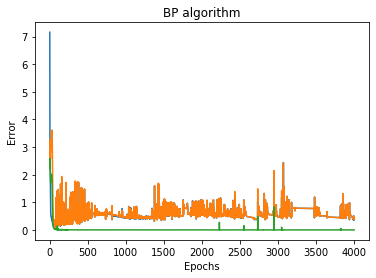

In [38]:
#for tar in y_train:
#    print(tar)
err_vector = []
alpha = 0.2
train_NeuralNetwork(4000,network_iris,x_train,y_train)
#testing patterns
testing_patterns(network_iris,x_train,y_train)

# Graph error
graph_error(err_vector)